# Interactive visualizations



In [1]:
!pip install folium

In [2]:
!pip install pandas

![title](unnamed.png)

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt2
import folium

In [55]:
Data = pd.read_csv('Historical_Tsunamis2.csv',sep=';', engine='python', encoding='latin-1')
JoinedData= pd.read_csv('Joined_data.csv')

In [56]:

Data

,ID,TSEVENT_ID,YEAR,MONTH,DAY,Date,ARR_DAY,ARR_HOUR,ARR_MIN,TRAV_HOURS,TRAV_MINS,PERIOD,FIRST_MOTI,LATITUDE,LONGITUDE,LOCATION_N,AREA,COUNTRY,REGION_COD,TYPE_MEASU,DAMAGE_MIL,DAMAGE_AMO,DAMAGE_DES,DEATHS,DEATHS_AMO,DEATHS_DES,INJURIES,INJURIES_A,INJURIES_D,HOUSES_DES,REGION,CAUSE,EQ_MAG_MFA,EQ_MAGNITU,EQ_MAGNI_1,EQ_DEPTH,TS_MT_ABE,TS_MT_II,TS_INTENSI,MISSING,MISSING_DE,MAP_EQ_ID,DAMAGE_TOT,HOUSES_D_4,HOUSES_TOT,INJURIES_T,INJURIES_1,INJURIES_2,MISSING_TO,MISSING__1,MISSING__2,NUM_DEPOSI
0,15817,2439,2004,12,26,26/12/2004,0,0,0,0,0,0,,5283,95247,"ACEH, SUMATRA",ACEH,INDONESIA,60,5,0,0,,0,0,,0,0,,0,,,0,0,0,0,0,0,0,0,,0,,0,,0,0,,0,0,,0
1,15818,2439,2004,12,26,26/12/2004,0,0,0,0,0,0,,5355,95242,"ACEH, SUMATRA",ACEH,INDONESIA,60,5,0,0,,0,0,,0,0,,0,,,0,0,0,0,0,0,0,0,,0,,0,,0,0,,0,0,,0
2,15820,2439,2004,12,26,26/12/2004,0,0,0,0,0,0,,5436,95235,"ACEH, SUMATRA",ACEH,INDONESIA,60,5,0,0,,0,0,,0,0,,0,,,0,0,0,0,0,0,0,0,,0,,0,,0,0,,0,0,,0
3,869,904,1861,2,16,1861/02/16,0,0,0,4,0,0,,55,9775,"FORT LAUDI, NIAS I., SUMATRA",NORTH SUMATRA,INDONESIA,60,1,0,2,Moderate (~$1 to $5 million),50,1,Few (~1 to 50 people),0,0,,0,,,0,0,0,0,0,0,0,0,,0,,0,,0,0,,0,0,,0
4,866,904,1861,2,16,1861/02/16,0,0,0,0,0,0,,415,961,"ANALABOO, SUMATRA, INDONESIA",ACEH,INDONESIA,60,1,0,2,Moderate (~$1 to $5 million),135,3,Many (~101 to 1000 people),0,0,,0,,,0,0,0,0,0,0,0,0,,0,,0,,0,0,,0,0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26819,25495,5463,2012,8,31,31/08/2012,31,18,41,5,53,11,,19283,166617,WAKE ISLAND,UM,USA TERRITORY,80,2,0,0,,0,0,,0,0,,0,,,0,0,0,0,0,0,0,0,,0,,0,,0,0,,0,0,,0
26820,465,549,1788,7,21,1788/07/21,0,0,0,0,0,0,F,5713,-15348,"THREE SAINTS BAY, KODIAK, AK",AK,USA,87,1,0,1,Limited (<$1 million),0,0,,0,0,,0,,,0,0,0,0,0,0,0,0,,0,,0,,0,0,,0,0,,0
26821,25668,5472,2013,1,5,05/01/2013,5,9,20,0,22,10,,56247,-134647,"PORT ALEXANDER, AK",AK,USA,87,2,0,0,,0,0,,0,0,,0,,,0,0,0,0,0,0,0,0,,0,,0,,0,0,,0,0,,0
26822,25669,5472,2013,1,5,05/01/2013,5,9,45,0,47,0,,57052,-135342,"SITKA, AK",AK,USA,87,2,0,0,,0,0,,0,0,,0,,,0,0,0,0,0,0,0,0,,0,,0,,0,0,,0,0,,0


## Locations ##

In [57]:
Data.columns

Index(['ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY', 'Date', 'ARR_DAY',
       'ARR_HOUR', 'ARR_MIN', 'TRAV_HOURS', 'TRAV_MINS', 'PERIOD',
       'FIRST_MOTI', 'LATITUDE', 'LONGITUDE', 'LOCATION_N', 'AREA', 'COUNTRY',
       'REGION_COD', 'TYPE_MEASU', 'DAMAGE_MIL', 'DAMAGE_AMO', 'DAMAGE_DES',
       'DEATHS', 'DEATHS_AMO', 'DEATHS_DES', 'INJURIES', 'INJURIES_A',
       'INJURIES_D', 'HOUSES_DES', 'REGION', 'CAUSE', 'EQ_MAG_MFA',
       'EQ_MAGNITU', 'EQ_MAGNI_1', 'EQ_DEPTH', 'TS_MT_ABE', 'TS_MT_II',
       'TS_INTENSI', 'MISSING', 'MISSING_DE', 'MAP_EQ_ID', 'DAMAGE_TOT',
       'HOUSES_D_4', 'HOUSES_TOT', 'INJURIES_T', 'INJURIES_1', 'INJURIES_2',
       'MISSING_TO', 'MISSING__1', 'MISSING__2', 'NUM_DEPOSI'],
      dtype='object')

In [62]:
temp = Data[['LATITUDE','LONGITUDE','DEATHS']]
temp = temp.dropna()

my_zip = zip(temp['LATITUDE'], temp['LONGITUDE'],temp['DEATHS'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(5283, 95247, 0),
 (5355, 95242, 0),
 (5436, 95235, 0),
 (55, 9775, 50),
 (415, 961, 135),
 (5479, 95249, 0),
 (5572, 95325, 0),
 (5584, 95347, 0),
 (5571, 95325, 0),
 (5575, 95326, 0),
 (5593, 95367, 0),
 (555, 95304, 0),
 (5562, 95317, 0),
 (5594, 95335, 0),
 (5588, 95361, 0)]

In [63]:
from folium.plugins import HeatMap
folium_hmap = folium.Map(location=[39.728593,8.952292], 
                         zoom_start=1.5, blur=0,
                         tiles="OpenStreetMap")


In [64]:
folium_hmap.add_child(HeatMap(list_of_my_zip,
                              min_opacity=1,
                              radius = 10,
                              blur = 10))

In [65]:
#BUILDING AN INTERACTIVE SET OF VISUALISATION TOOLS 
#install packages..
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install nbinteract


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [33]:
#conda install -c plotly chart-studio
#conda install -c conda-forge cufflinks-py

In [66]:
#IMPORTS FROM THE PACKAGES
import scipy
import plotly.express as px
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

import os
from IPython.display import Image, display, HTML

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [67]:
pd.set_option('display.max_columns', None)
Data.columns


Index(['ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY', 'Date', 'ARR_DAY',
       'ARR_HOUR', 'ARR_MIN', 'TRAV_HOURS', 'TRAV_MINS', 'PERIOD',
       'FIRST_MOTI', 'LATITUDE', 'LONGITUDE', 'LOCATION_N', 'AREA', 'COUNTRY',
       'REGION_COD', 'TYPE_MEASU', 'DAMAGE_MIL', 'DAMAGE_AMO', 'DAMAGE_DES',
       'DEATHS', 'DEATHS_AMO', 'DEATHS_DES', 'INJURIES', 'INJURIES_A',
       'INJURIES_D', 'HOUSES_DES', 'REGION', 'CAUSE', 'EQ_MAG_MFA',
       'EQ_MAGNITU', 'EQ_MAGNI_1', 'EQ_DEPTH', 'TS_MT_ABE', 'TS_MT_II',
       'TS_INTENSI', 'MISSING', 'MISSING_DE', 'MAP_EQ_ID', 'DAMAGE_TOT',
       'HOUSES_D_4', 'HOUSES_TOT', 'INJURIES_T', 'INJURIES_1', 'INJURIES_2',
       'MISSING_TO', 'MISSING__1', 'MISSING__2', 'NUM_DEPOSI'],
      dtype='object')

In [69]:
#COLUMN EXPLORER
@interact
def show_recs_more_than(column=list(Data.select_dtypes('number').columns), 
                          x=(50, 80, 1)):
    display(HTML(f'<h2>Showing records with more than {x} {column}<h2>'))
    display(Data.loc[Data[column] > x, ['INJURIES', 'MISSING',
       'HOUSES_TOT', 'DEATHS',
      ]])

interactive(children=(Dropdown(description='column', options=('ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY', 'ARR…

In [70]:
#IMAGE EXPLORER
fdir = 'pics/'

@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir+file))

interactive(children=(Dropdown(description='file', options=('chile.jpg', 'chile2.jpg', 'Japan.jpg', 'tsunami-j…

In [79]:
#CORRELATION EXPLORER - TO CHECK!!!
@interact
def correlations(column1=list(JoinedData.select_dtypes('number').columns), 
                 column2=list(JoinedData.select_dtypes('number').columns)):
    print(f"Correlation: {JoinedData[column1].corr(JoinedData[column2])}")

interactive(children=(Dropdown(description='column1', options=('Unnamed: 0', 'AverageTemperature', 'AverageTem…

In [ ]:
#COLUMN DESCRIBE
@interact
def describe(column=list(Data.columns)):
    print(Data[column].describe())

In [ ]:
#INTERACTIVE PLOTS
@interact
def scatter_plot(x=list(JoinedData.select_dtypes('number').columns), 
                 y=list(JoinedData.select_dtypes('number').columns)[1:]):
    JoinedData.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')

In [ ]:
@interact
def scatter_plot(x=list(JoinedData.select_dtypes('number').columns), 
                 y=list(JoinedData.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    JoinedData.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 

             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)

In [ ]:
tsunamis['DEATHS'] = pd.cut(df['DEATHS']), bins=range(0, 35, 5))
tsunamis['DEATHS'] = tsunamis['DEATHS'].astype(str)

tsunamis['INJURIES_2'] = pd.cut(tsunamis['INJURIES_2'], bins=range(1, 50, 5))
tsunamis['INJURIES_2'] = tsunamis['INJURIES_2'].astype(str)

@interact
def scatter_plot(x=list(tsunamis.select_dtypes('number').columns), 
                 y=list(tsunamis.select_dtypes('number').columns)[1:],
                 categories=['DEATHS', 'INJURIES_2', 'type'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

In [ ]:
@interact_manual
def scatter_plot(x=list(tsunamis.select_dtypes('number').columns), 
                 y=list(tsunamis.select_dtypes('number').columns)[1:],
                 categories=['INJURIES_2', 'DEATHS'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    tsunamis.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

In [ ]:
cscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

In [ ]:
sub_tsunamis=Data[['INJURIES_2','DEATHS', 'INJURIES']]

In [30]:
import plotly.figure_factory as ff

corrs = sub_tsunamis.corr()

@interact_manual
def plot_corrs(colorscale=cscales):
    figure = ff.create_annotated_heatmap(z = corrs.round(2).values, 
                                     x =list(corrs.columns), 
                                     y=list(corrs.index), 
                                     colorscale=colorscale,
                                     annotation_text=corrs.round(2).values)
    iplot(figure)

NameError: name 'sub_tsunamis' is not defined

In [ ]:
Data.head()

In [ ]:
#INTERACTIVE MAP
fig = px.scatter_geo(Data, lat="X", lon="Y",
                     color='EQ_MAGNI_1', hover_name='INJURIES_2', 
                projection="orthographic")
fig
#color="n_cattle", # which column to use to set the color of markers
                     #hover_name="number_affected_last_fmd", # column added to hover information
                     #size="binned_n_cattle", # size of markers

In [37]:
#we need to define what
fig = px.choropleth(Data, lat="X", lon="Y",
                     color='DEATHS', hover_name='INJURIES_2',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope=" ",
                           labels={'deaths':'deaths'}
                          )
fig

ValueError: Invalid property specified for object of type plotly.graph_objs.Choropleth: 'lat'

Did you mean "geo"?

    Valid properties:
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `colorscale`. In case `colorscale` is unspecified or
            `autocolorscale` is true, the default  palette will be
            chosen according to whether numbers in the `color`
            array are all positive, all negative or mixed.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.choropleth.ColorBar`
            instance or dict with compatible properties
        colorscale
            Sets the colorscale. The colorscale must be an array
            containing arrays mapping a normalized value to an rgb,
            rgba, hex, hsl, hsv, or named color string. At minimum,
            a mapping for the lowest (0) and highest (1) values are
            required. For example, `[[0, 'rgb(0,0,255)'], [1,
            'rgb(255,0,0)']]`. To control the bounds of the
            colorscale in color space, use`zmin` and `zmax`.
            Alternatively, `colorscale` may be a palette name
            string of the following list: Blackbody,Bluered,Blues,C
            ividis,Earth,Electric,Greens,Greys,Hot,Jet,Picnic,Portl
            and,Rainbow,RdBu,Reds,Viridis,YlGnBu,YlOrRd.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        featureidkey
            Sets the key in GeoJSON features which is used as id to
            match the items included in the `locations` array. Only
            has an effect when `geojson` is set. Support nested
            property, for example "properties.name".
        geo
            Sets a reference between this trace's geospatial
            coordinates and a geographic map. If "geo" (the default
            value), the geospatial coordinates refer to
            `layout.geo`. If "geo2", the geospatial coordinates
            refer to `layout.geo2`, and so on.
        geojson
            Sets optional GeoJSON data associated with this trace.
            If not given, the features on the base map are used. It
            can be set as a valid GeoJSON object or as a URL
            string. Note that we only accept GeoJSONs of type
            "FeatureCollection" or "Feature" with geometries of
            type "Polygon" or "MultiPolygon".
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.choropleth.Hoverlabel`
            instance or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.choropleth.Legendgrouptitl
            e` instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        locationmode
            Determines the set of locations used to match entries
            in `locations` to regions on the map. Values "ISO-3",
            "USA-states", *country names* correspond to features on
            the base map and value "geojson-id" corresponds to
            features from a custom GeoJSON linked to the `geojson`
            attribute.
        locations
            Sets the coordinates via location IDs or names. See
            `locationmode` for more info.
        locationssrc
            Sets the source reference on Chart Studio Cloud for
            `locations`.
        marker
            :class:`plotly.graph_objects.choropleth.Marker`
            instance or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        reversescale
            Reverses the color mapping if true. If true, `zmin`
            will correspond to the last color in the array and
            `zmax` will correspond to the first color.
        selected
            :class:`plotly.graph_objects.choropleth.Selected`
            instance or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace.
        stream
            :class:`plotly.graph_objects.choropleth.Stream`
            instance or dict with compatible properties
        text
            Sets the text elements associated with each location.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.choropleth.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        z
            Sets the color values.
        zauto
            Determines whether or not the color domain is computed
            with respect to the input data (here in `z`) or the
            bounds set in `zmin` and `zmax`  Defaults to `false`
            when `zmin` and `zmax` are set by the user.
        zmax
            Sets the upper bound of the color domain. Value should
            have the same units as in `z` and if set, `zmin` must
            be set as well.
        zmid
            Sets the mid-point of the color domain by scaling
            `zmin` and/or `zmax` to be equidistant to this point.
            Value should have the same units as in `z`. Has no
            effect when `zauto` is `false`.
        zmin
            Sets the lower bound of the color domain. Value should
            have the same units as in `z` and if set, `zmax` must
            be set as well.
        zsrc
            Sets the source reference on Chart Studio Cloud for
            `z`.
        
Did you mean "geo"?

Bad property path:
lat
^^^

In [38]:
#conda create -n geo_env
conda activate geo_env
conda config  --env --add channels conda-forge
conda config --env --set channel_priority strict
conda install geopandas

SyntaxError: invalid syntax (<ipython-input-38-366ed9e214f9>, line 2)

In [51]:
#conda install geopandas
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [52]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.gps_coordinates_lon, df.gps_coordinates_lat))

NameError: name 'geopandas' is not defined

In [53]:
from ipyleaflet import Map, GeoJSON, GeoData, basemaps, Heatmap

ModuleNotFoundError: No module named 'ipyleaflet'

In [54]:
m = Map(basemap=basemaps.OpenTopoMap, center=(-0.3158116,36.0088201), zoom=10)

NameError: name 'Map' is not defined

In [43]:
geo_data = GeoData(geo_dataframe = gdf,
    style={'color': 'black', 'radius':8, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'Release')

m.add_layer(geo_data)

NameError: name 'GeoData' is not defined

##LIVE VISUALIZATION OF THE TSUNAMIS OVER TIME

In [44]:
conda install -c conda-forge basemap-data-hires

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [50]:
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

KeyError: 'PROJ_LIB'

In [ ]:
Data['Year']= Data['Date'].str[6:]

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.text(.8, .3, 'Soumitra', ha='right')
cmap = plt.get_cmap('coolwarm')

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')


START_YEAR = 1700
LAST_YEAR = 2013

points = Data[['Date', 'X', 'Y']][Data['Year']==str(START_YEAR)]

x, y= m(list(points['X']), list(points['Y']))
scat = m.scatter(x, y, s = points['DEATHS']*points['INJURIES']*0.3, marker='o', alpha=0.3, zorder=10, cmap = cmap)
year_text = plt.text(-170, 80, str(START_YEAR),fontsize=15)
plt.title("Tsunamis visualisation (1700 - 2013)")
plt.close()


def update(frame_number):
    current_year = START_YEAR + (frame_number % (LAST_YEAR - START_YEAR + 1))
    year_text.set_text(str(current_year))
    points = Data[['Date', 'Time', 'X', 'Y',]][t_file['Year']==str(current_year)]
    x, y= m(list(points['X']), list(points['Y']))
    color = points['INJURIES_2']*points['DEATHS'];
    scat.set_offsets(np.dstack((x, y)))
    scat.set_sizes(points['DEATHS']*points['INJURIES_2']*0.3)
    
ani = animation.FuncAnimation(fig, update, interval=750, frames=LAST_YEAR - START_YEAR + 1)
ani.save('animation.gif', writer='imagemagick', fps=5)

In [ ]:
import io
import base64

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))


In [46]:
JoinedData.columns


Index(['Unnamed: 0', 'Date', 'AverageTemperature',
       'AverageTemperatureUncertainty', 'COUNTRY', 'YEAR', 'MONTH',
       'CAUSE_MODE', 'EQ_MAGNI_MEAN', 'ID_FIRST', 'DEATHS_MEAN', 'DEATHS_MAX',
       'DEATHS_STD', 'DATE_FIRST', 'Event_Tsunami', 'Event_Earthquake',
       'DATE_STRIN_x', 'LATITUDE_x', 'LONGITUDE_x', 'PENUMBRAL',
       'PARTIAL ECLIPSE', 'DURATION_x', 'EVENT_x', 'DATE_STRIN_y',
       'ECLIPSE_TYPE', 'MAGNITUD', 'LATITUDE_y', 'LONGITUDE_y', 'DURATION_y',
       'EVENT_y', 'DATE_STRIN', 'PLANET_POSITION', 'Lunar_Eclipse',
       'Solar_Eclipse'],
      dtype='object')

In [47]:
JoinedData.head()

,Unnamed: 0,Date,AverageTemperature,AverageTemperatureUncertainty,COUNTRY,YEAR,MONTH,CAUSE_MODE,EQ_MAGNI_MEAN,ID_FIRST,DEATHS_MEAN,DEATHS_MAX,DEATHS_STD,DATE_FIRST,Event_Tsunami,Event_Earthquake,DATE_STRIN_x,LATITUDE_x,LONGITUDE_x,PENUMBRAL,PARTIAL ECLIPSE,DURATION_x,EVENT_x,DATE_STRIN_y,ECLIPSE_TYPE,MAGNITUD,LATITUDE_y,LONGITUDE_y,DURATION_y,EVENT_y,DATE_STRIN,PLANET_POSITION,Lunar_Eclipse,Solar_Eclipse
0,0,1855-05-01,7.152,1.296,Chile,1855,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1855-05-02,15S,62W,346.1,221.5,96.5,lunar_eclipse,1855-05-16,P,0.7624,62.9N,16.6E,NaN,solar_eclipse,NaN,NaN,1,1
1,1,1855-06-01,4.257,1.641,Chile,1855,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2,1855-07-01,4.113,1.313,Chile,1855,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,3,1855-08-01,5.508,1.168,Chile,1855,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,4,1855-09-01,6.684,1.153,Chile,1855,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [48]:
events=JoinedData[['YEAR','Lunar_Eclipse','Solar_Eclipse']]
events=pd.melt(events,id_vars=['YEAR'])
events.head();

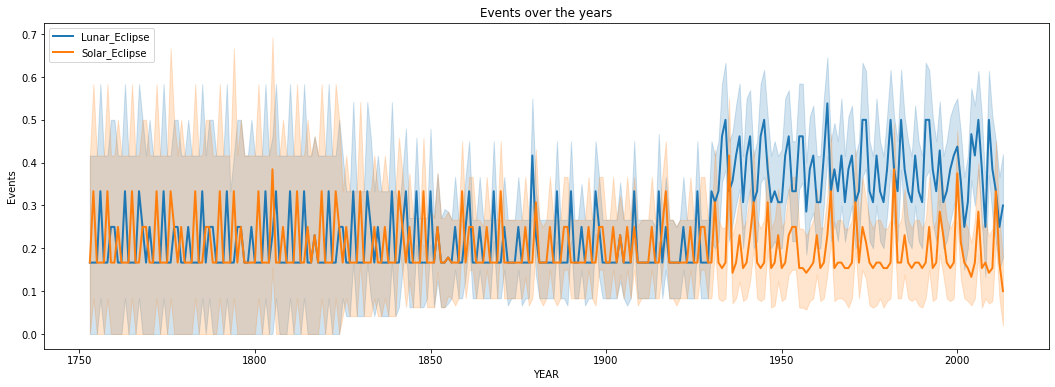

In [49]:
plt.figure(figsize=(18,6))
sns.lineplot(data=events, x='YEAR', y='value',hue='variable',linewidth=2)
plt.title('Events over the years')
plt.legend(['Lunar_Eclipse', 'Solar_Eclipse'],loc='upper left')
plt.ylabel('Events');

<ipython-input-36-7823dc05f13d>:5: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



<ipython-input-36-7823dc05f13d>:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



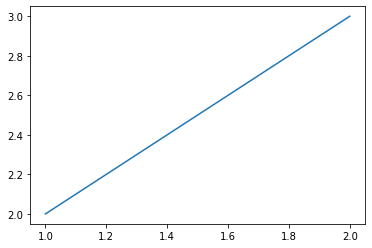

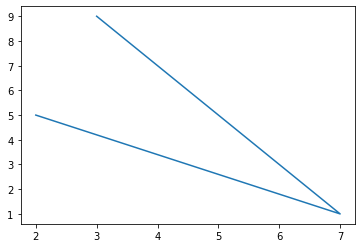

In [36]:
import matplotlib.pyplot as plt
#One way to plot two figure at once
f = plt.figure(1)
plt.plot([1,2],[2,3])
f.show()
g = plt.figure(2)
plt.plot([2,7,3],[5,1,9])
g.show()